In [ ]:
from collections import Counter 
import numpy as np
import random
import json

In [ ]:
alphabet = set("abcdefghijklmnopqrstuvwxyzåäö")
alphabet_list = list("abcdefghijklmnopqrstuvwxyzåäö")

words = open("/home/valle/Data/svenska120k.txt").read().split("\n")
words = {w for w in words if 
         w.islower() and w.isalpha() and len(w) >= 4
         and set(w) - alphabet == set()
         and len(set(w)) <= 7}

with open("../wordlist.txt", "w") as f:
    f.write("\n".join(words))

In [ ]:
def get_valid_words_from_combo(combo: str, center: str, word_list: list[str]):
    words = [w for w in word_list 
             if center in w 
             and all(c in combo for c in w)]
    return words

def get_pangrams(combo: str, word_list: list[str]):
    return [w for w in word_list if len(set(w)) == 7 
            and all(c in combo for c in w)]

In [ ]:
from itertools import combinations, chain
from collections import defaultdict

def powerset(iterable):
    "powerset([1,2,3]) --> (1,) (2,) (3,) (1,2) (1,3) (2,3) (1,2,3)"
    s = list(iterable)
    return chain.from_iterable(combinations(s, r) for r in range(1, len(s)+1))

# "bacdefg" -> d["abcdefg"] += 1
# d1["abcdefg"] = d["abcdefg"] += d["bcdefg"] += d["acdefg"] +... + d["cde"] + ... d["g"]

# mapping from set of letters to number of words that can be made from exactly those letters
d = defaultdict(int)
for word in words:
    d[frozenset(word)] += 1

# mapping from (combo, c) where combo is a set of 7 letters and c is a center letter in combo
# to number of words that can be made from any subset of combo that contains c
d1 = defaultdict(int)
for combo in list(d.keys()):
    if len(combo) == 7:
        for c in combo:
            for subset in powerset(combo):
                if c in subset:
                    d1[(combo, c)] += d[frozenset(subset)]

# change frozensets to strings for json serialization
combo_center_counts = {("".join(sorted(s)), c): v for (s,c), v in d1.items()}

In [52]:
d = {"".join(sorted(s)): v for s, v in d.items() if len(s) == 7}
d = dict(sorted(d.items(), key=lambda x: x[1], reverse=True))
pangram_counts = d

In [ ]:
# test 
for (s, c), v, in combo_center_counts.items():
    assert v == len(get_valid_words_from_combo(s, c, words))
    assert len(get_pangrams(s, words)) != 0

In [ ]:
len({k: v for k,v in combo_center_counts.items() if v > 40})
sorted(combo_center_counts.items(), key=lambda x: x[1], reverse=True)
get_valid_words_from_combo("aeklrst", "a", words)
for c in alphabet_list:
    print(c, len({k: v for k,v in combo_center_counts.items() if v > 30 and k[1] == c}))

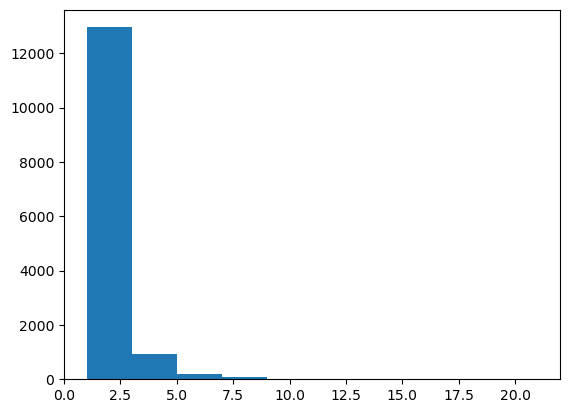

1.0

In [81]:
import numpy as np 
import matplotlib.pyplot as plt
from collections import Counter

plt.hist(list(pangram_counts.values()), bins=10); plt.show()
np.median(list(pangram_counts.values()))
# np.max(list(combo_center_counts.values()))
# c = Counter("".join(x[1] for x in combo_center_counts.keys()))
# plt.bar(sorted(c.keys()), [c[x] for x in sorted(c.keys())]); plt.show()

In [ ]:
def to_json(d): return {s+c: v for (s,c), v in d.items()}
def from_json(d): return {(s[:-1], s[-1]): v for s, v in d.items()}

# good_combos = {k: v for k,v in combo_center_counts.items() if v > 40}
# assert from_json(to_json(good_combos)) == good_combos
# json.dump(to_json(dict(sorted(good_combos.items(), key=lambda x: x[1], reverse=True))), 
#           open("../combo_center_counts.json", "w"), ensure_ascii=False)

In [ ]:
combo_center_counts = from_json(json.load(open("../combo_center_counts.json", "r")))

def create_game():
    combo, center = random.choice(list(combo_center_counts.keys()))
    print(combo, center)
    valid_words = get_valid_words_from_combo(combo, center, words)
    pangrams = [w for w in valid_words if len(set(w)) == 7]
    game = {
        "letters": list(combo),
        "center": center,
        "validWords": valid_words,
        "pangrams": pangrams
    }
    return game

game = create_game()
print(len(game["validWords"]))
print(game["pangrams"])
game


In [24]:
from datetime import datetime, timedelta
import os

datetime.now() + timedelta(days=1)

datetime.datetime(2023, 9, 9, 23, 13, 41, 846925)